# Author Details:

### **Name: Muhammad Hamid**
### **linkedin** :https://www.linkedin.com/in/muhammad-hamid-87242a312/

# Titanic Dataset Analysis

In this notebook, we will perform data cleaning and exploratory data analysis (EDA) on the Titanic dataset using Pandas. We will handle `missing values`, `generate summary statistics`, and `visualize` the data.

### Step 1: Importing libraries

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # removes warnings

# Setting the style for plots
sns.set(style="whitegrid")

### Step 1: Loading Titanic dataset

In [2]:
# lets load the titanic dataset using seaborn in pandas datyframe

df = sns.load_dataset('titanic')

# lets check the first 5 rows of the dataset
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## Initial Data Inspection

Let's take a first look at the `dataset` to understand its structure and contents.

In [3]:
# display first few rows of the dataset
df.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [4]:
# gets teh summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
# gets the statistical summary of the dataset
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Handling Missing Values

We need to handle `missing values` to ensure the `dataset` is clean and ready for `analysis`.

In [6]:
# lets check the number of missing values in the dataset in descending order
df.isnull().sum().sort_values(ascending=False)

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

In [7]:
# lets check the percentage of missing values in the dataset in descending order
round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)

deck           77.22
age            19.87
embarked        0.22
embark_town     0.22
survived        0.00
pclass          0.00
sex             0.00
sibsp           0.00
parch           0.00
fare            0.00
class           0.00
who             0.00
adult_male      0.00
alive           0.00
alone           0.00
dtype: float64

### Strategy for Handling Missing Values

- **Age**: Fill missing values with the median age.
- **Deck**: currently i am droping this column beacuse it have more then 75% of missing values.
- **Embarked**: Fill missing values with the mode (most common value).

In [8]:
# handling MISSING Values in age column 
df['age'].fillna(df['age'].mean(), inplace=True)

# Drop the 'deck' column
df.drop(columns='deck', inplace=True)

# handling missing values in embarked column
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# # handling missing values in embarked_town column
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

# lets check the number of missing values in the dataset in descending order
df.isnull().sum().sort_values(ascending=False)

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

## handling outlires

In [9]:
def remove_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Apply outlier removal to numerical columns
numerical_columns = ['age', 'fare', 'sibsp', 'parch']
df = remove_outliers(df, numerical_columns)

In [10]:
df.shape

(577, 14)

In [11]:
# saveing data to csv
df.to_csv('titanic_cleaned.csv', index=False)

## Exploratory Data Analysis (EDA)

We will now perform EDA to understand the distribution of the data and relationships between variables.

### Summary Statistics

Let's generate some summary statistics for the dataset.

In [12]:
# Summary statistics for numerical columns
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,577.000000,577.000000,577.000000,577.000000,577.0,577.000000
mean,0.299827,2.502600,29.742060,0.199307,0.0,14.926356
std,0.458579,0.733909,8.516997,0.445034,0.0,12.606521
min,0.000000,1.000000,5.000000,0.000000,0.0,0.000000
25%,0.000000,2.000000,24.000000,0.000000,0.0,7.775000
50%,0.000000,3.000000,29.699118,0.000000,0.0,8.662500
75%,1.000000,3.000000,32.500000,0.000000,0.0,15.850000
max,1.000000,3.000000,54.000000,2.000000,0.0,61.175000


In [13]:
# getting column names
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'embark_town', 'alive',
       'alone'],
      dtype='object')

### Univariate Analysis

We will analyze individual features to understand their distributions.

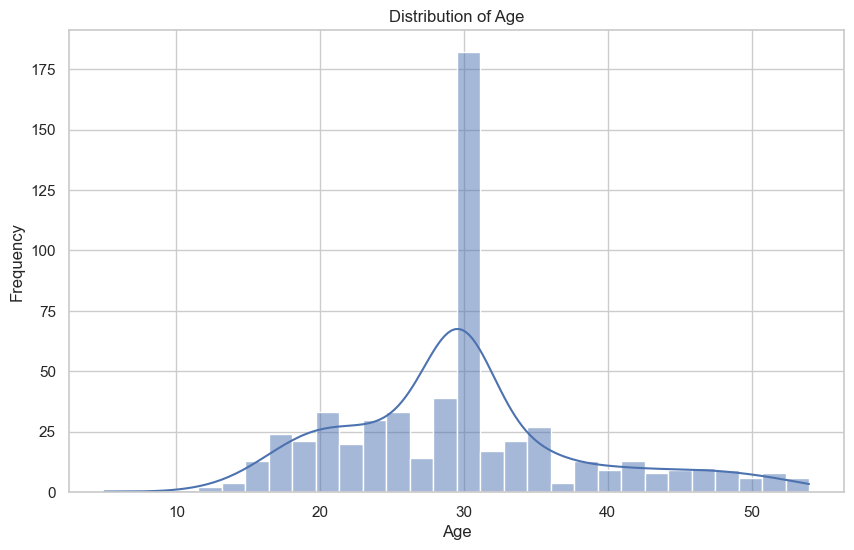

In [14]:
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

#### lets create Count plot for Pclass

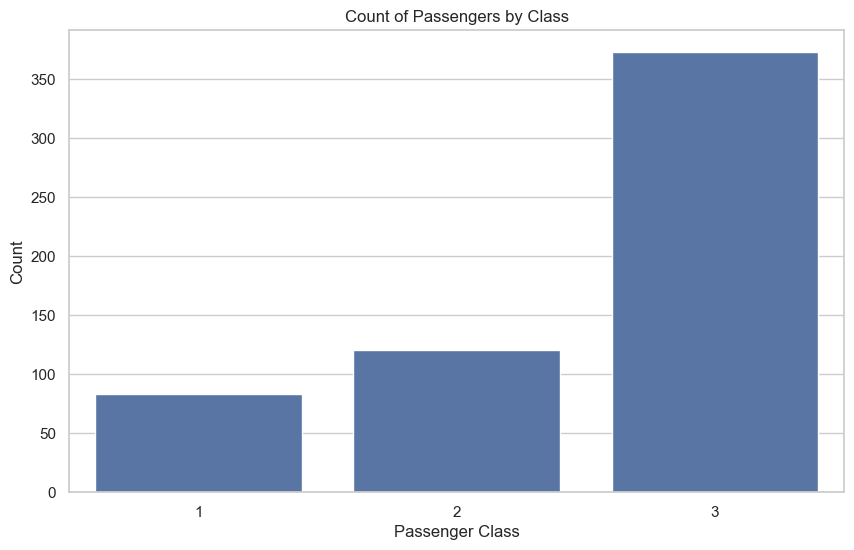

In [15]:
# Count plot for Pclass
plt.figure(figsize=(10, 6))
sns.countplot(x='pclass', data=df)
plt.title('Count of Passengers by Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

### Bivariate Analysis

We will analyze the relationship between different features.

#### lets check Survival rate by Pclass

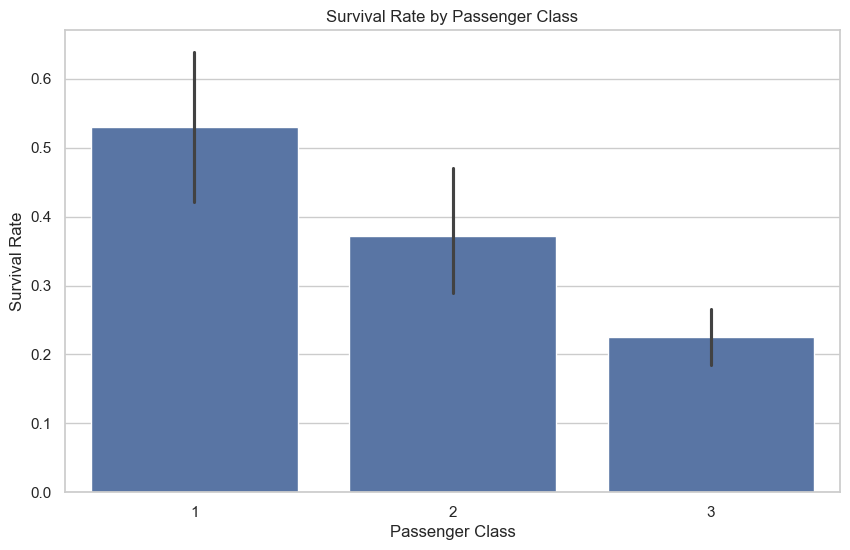

In [16]:
# Survival rate by Pclass
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

#### lets check Survival rate by Sex

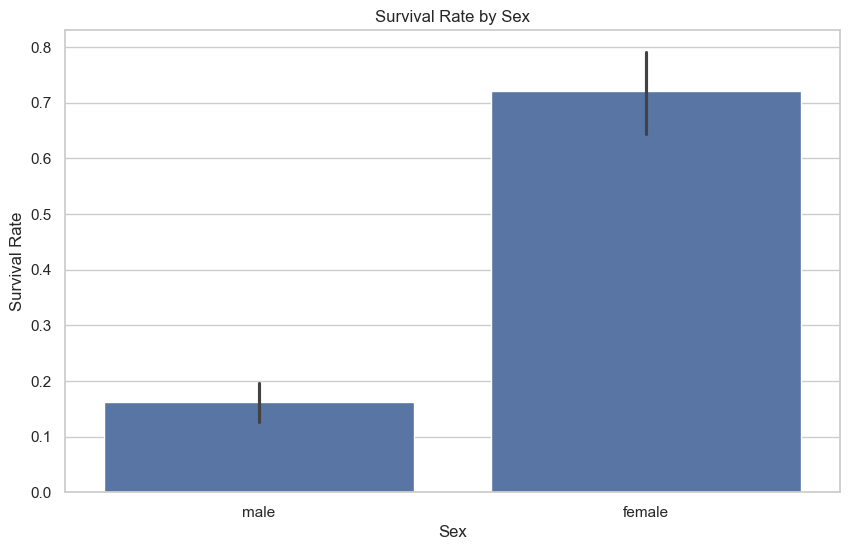

In [17]:
# Survival rate by Sex
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='survived', data=df)
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.show()

#### lets check Survival rate by Embarked_town

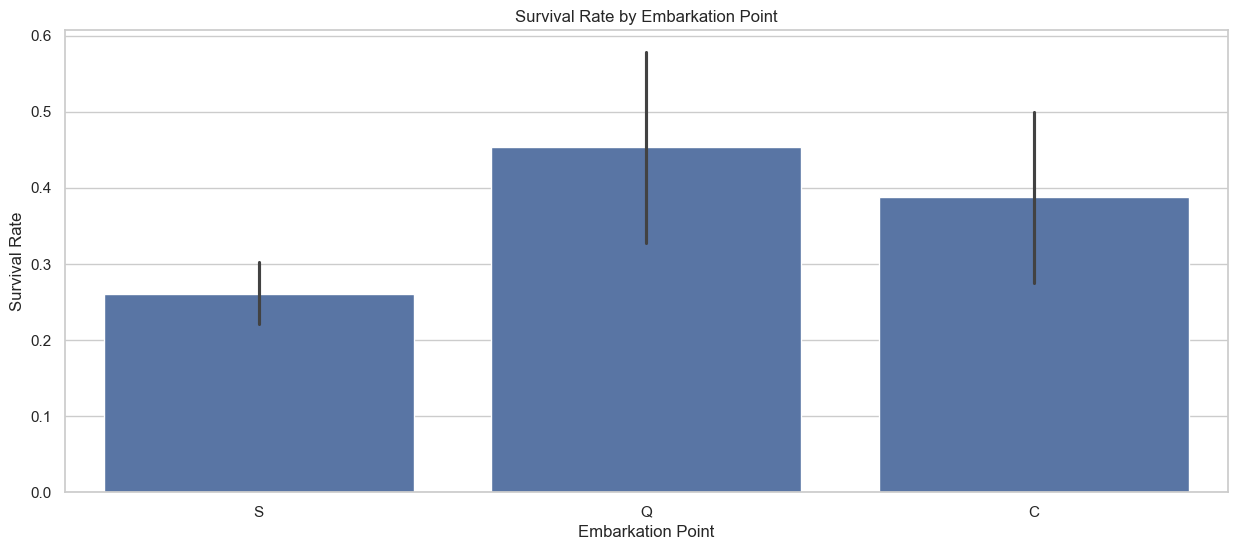

In [18]:
# Survival rate by Embarked
plt.figure(figsize=(15, 6))
sns.barplot(x='embarked', y='survived', data=df)
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Survival Rate')
plt.show()

### Multivariate Analysis

We will analyze the interactions between multiple features simultaneously.

#### lets create Pairplot for selected features

<Figure size 1200x1500 with 0 Axes>

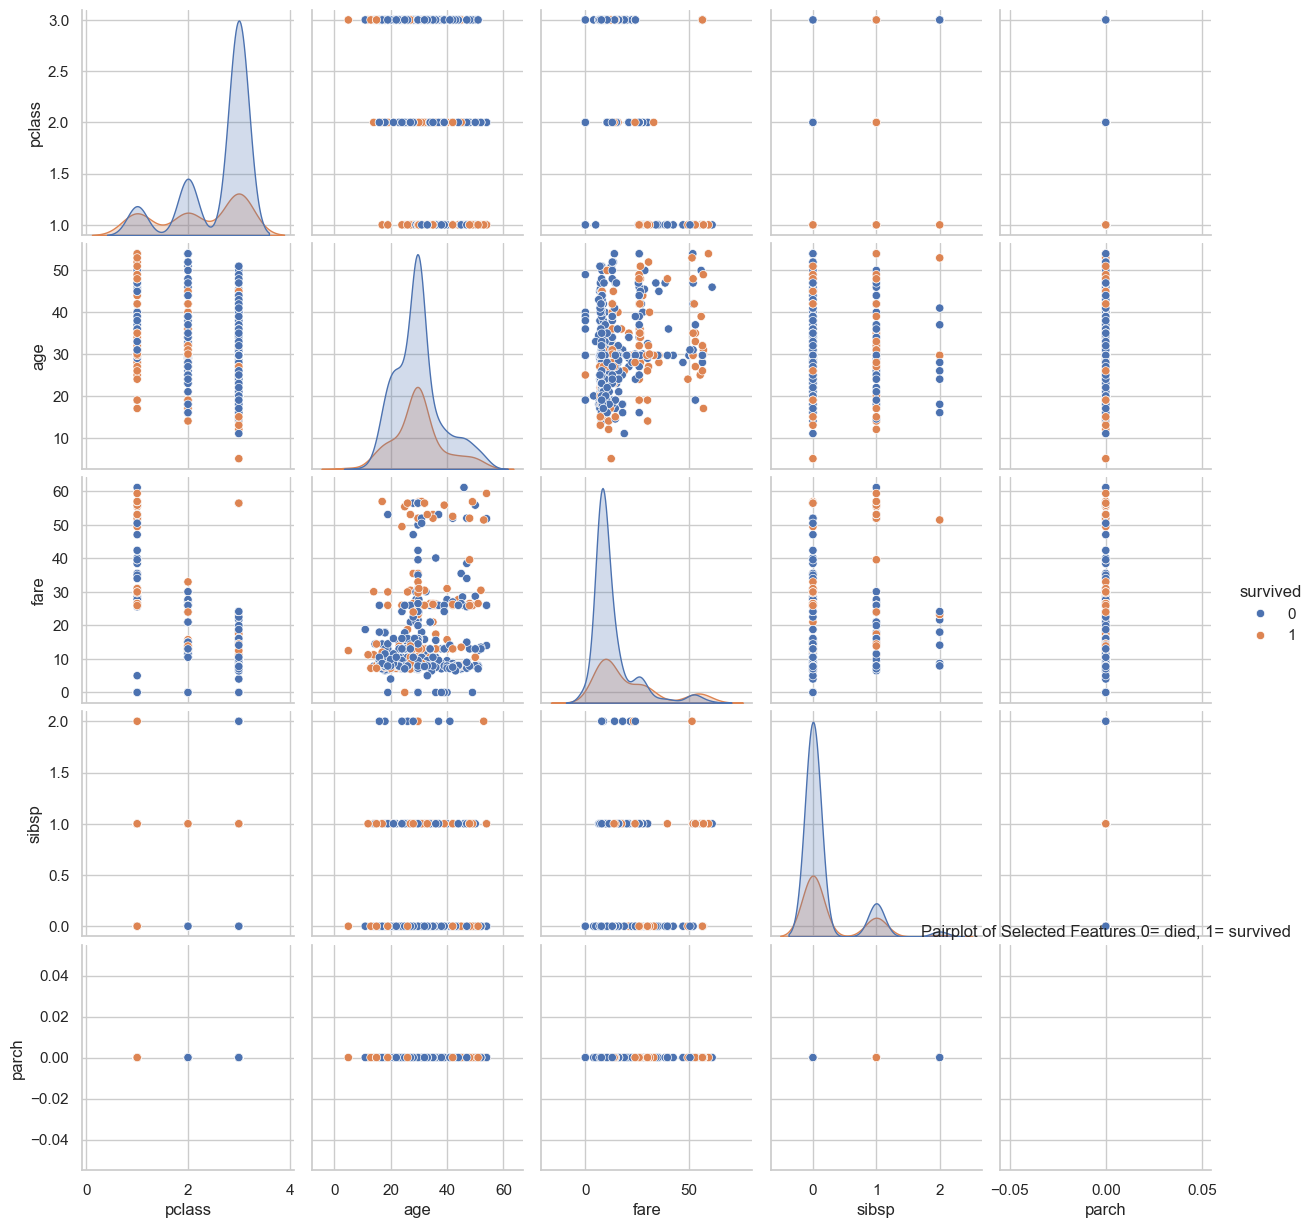

In [19]:
# Pairplot for selected features
plt.figure(figsize=(12, 15))
sns.pairplot(df[['survived', 'pclass', 'age', 'fare', 'sibsp', 'parch']], hue='survived')
plt.title('Pairplot of Selected Features 0= died, 1= survived')
plt.show()

# **Conclusion**

In this notebook, we performed data cleaning and exploratory data analysis on the Titanic dataset. We handled missing values, generated summary statistics, and visualized the data to uncover interesting patterns and insights.